In [1]:
from federated_learning.utils import SHAPUtil
from federated_learning import Configuration
from federated_learning import LocalEnvironment

In [2]:
config = Configuration()
data = config.DATASET(config)
sim_env = LocalEnvironment(config, data)
sim_env.poison_clients()

MNIST training data loaded.
MNIST test data loaded.
Create Clients
1 clients poisoned
Label Flipping from 5 to 4


In [3]:
sim_env.clients[0].test()
for epoch in range(1, config.N_EPOCHS + 1):
    sim_env.clients[0].train(epoch)
    sim_env.clients[0].test()


Test set: Average loss: 0.0023, Accuracy: 1357/10000 (14%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311408
Train Epoch: 1 [13200/60000 (22%)]	Loss: 1.913399
Train Epoch: 1 [26400/60000 (44%)]	Loss: 1.330990
Train Epoch: 1 [39600/60000 (66%)]	Loss: 0.997533
Train Epoch: 1 [52800/60000 (88%)]	Loss: 0.778858

Test set: Average loss: 0.0011, Accuracy: 8109/10000 (81%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.860117
Train Epoch: 2 [13200/60000 (22%)]	Loss: 0.681510
Train Epoch: 2 [26400/60000 (44%)]	Loss: 0.619638
Train Epoch: 2 [39600/60000 (66%)]	Loss: 0.426531
Train Epoch: 2 [52800/60000 (88%)]	Loss: 0.444945

Test set: Average loss: 0.0010, Accuracy: 8491/10000 (85%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.351935
Train Epoch: 3 [13200/60000 (22%)]	Loss: 0.600560
Train Epoch: 3 [26400/60000 (44%)]	Loss: 0.499680
Train Epoch: 3 [39600/60000 (66%)]	Loss: 0.424141
Train Epoch: 3 [52800/60000 (88%)]	Loss: 0.367263

Test set: Average loss: 0.0011, Accuracy: 8579/10000 (86%)

Train Epoch: 4 [0/600

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [4],
        [6],
        [7],
        [8],
        [9]])


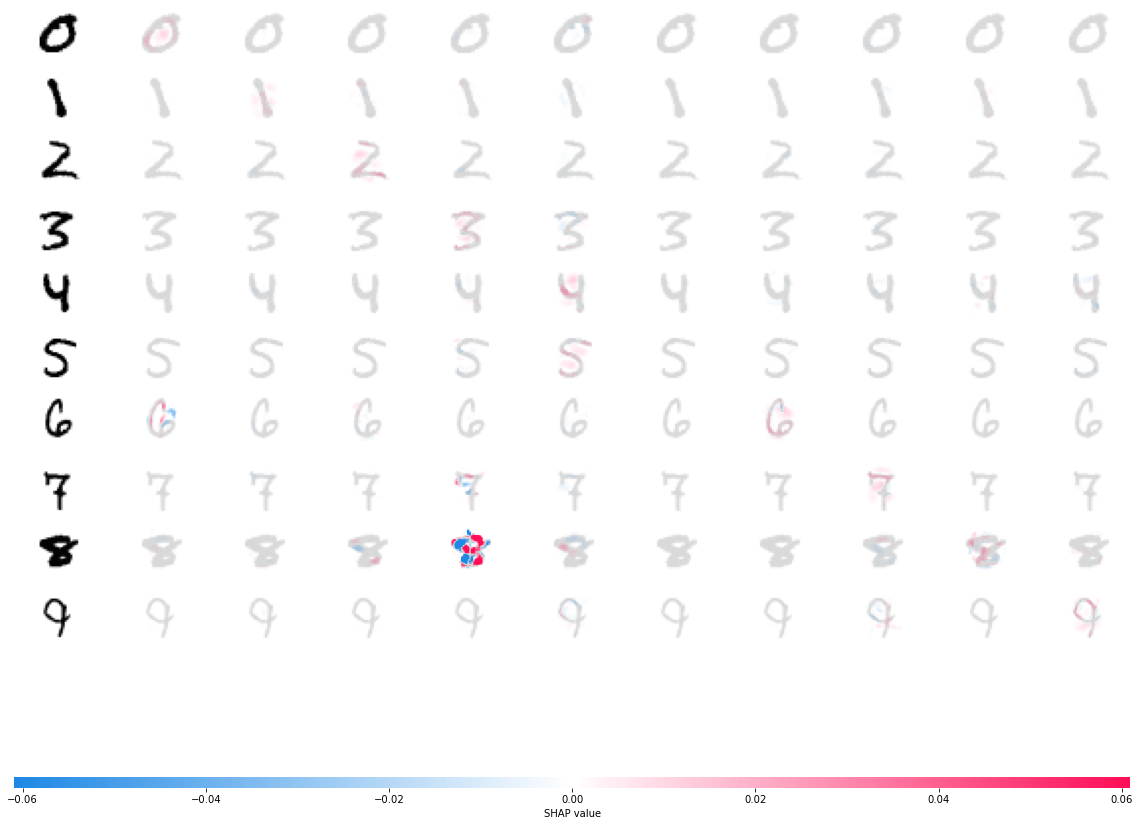

In [4]:
shap_util = SHAPUtil(data.test_dataloader, sim_env.clients[0].net)
shap_util.plot()